
1.1 Load the data and inspect it

Let's start by loading the dataset and inspecting its contents.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train_and_test2.csv')

# Display the first few rows of the dataset
print(data.head())

# Display the structure and summary of the dataset
print(data.info())
print(data.describe())


   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

1.2 Handle missing values

Handle missing values and drop irrelevant columns

In [10]:
# Drop irrelevant columns (those containing only zeros)
data.drop(columns=[col for col in data.columns if data[col].eq(0).all()], inplace=True)

# Fill missing Embarked values with the most common port
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# confirm that there are no more missing values
print(data.isnull().sum())

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64


C:\Users\Aashik\AppData\Local\Temp\ipykernel_10100\3276511218.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


1.3 Normalize or standardize the data if necessary

In [17]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Standardize Age and Fare
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Display the first few rows of the processed dataset
print(data.head())


   Passengerid       Age      Fare  Sex  sibsp  Parch  Pclass  Embarked  \
0            1 -0.581628 -0.503291    0      1      0       3       2.0   
1            2  0.658652  0.734744    1      1      0       1       0.0   
2            3 -0.271558 -0.490240    1      0      0       3       2.0   
3            4  0.426099  0.383183    1      1      0       1       2.0   
4            5  0.426099 -0.487824    0      0      0       3       2.0   

   2urvived  
0         0  
1         1  
2         1  
3         1  
4         0  


Exploratory Data Analysis (EDA)

2.1 Understand the distribution of data and the relationship between features

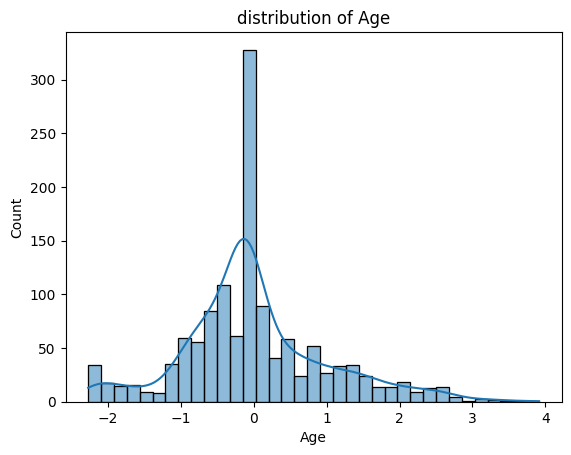

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'Age' feature
sns.histplot(data['Age'],bins= 35,kde = True)
plt.title('distribution of Age')
plt.show()

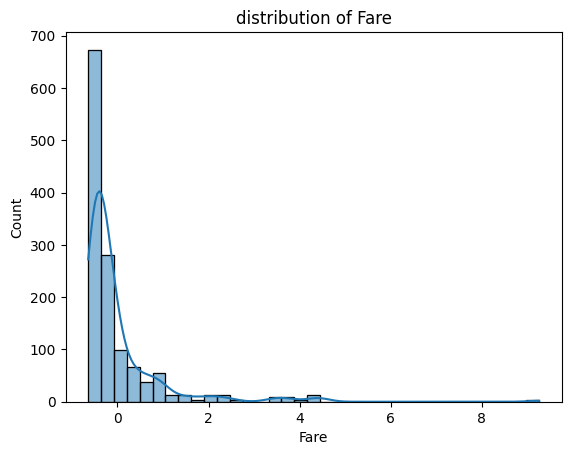

In [23]:
#visualise the distribution of Fare feature

sns.histplot(data['Fare'],bins=35,kde=True)
plt.title('distribution of Fare')
plt.show()

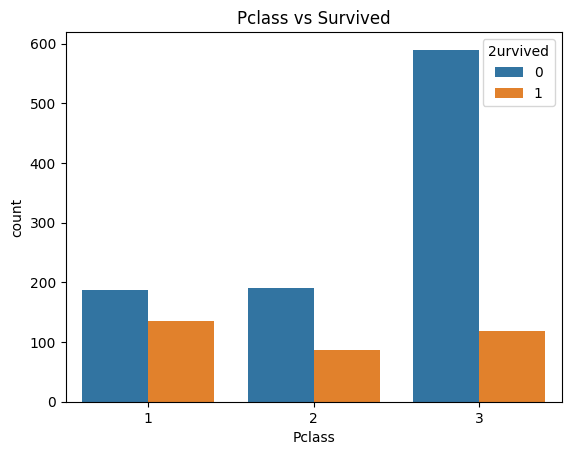

In [28]:
# Visualize the relationship between 'Pclass' and '2urvived'

sns.countplot(x = 'Pclass' , hue = '2urvived', data = data)
plt.title('Pclass vs Survived')
plt.show()

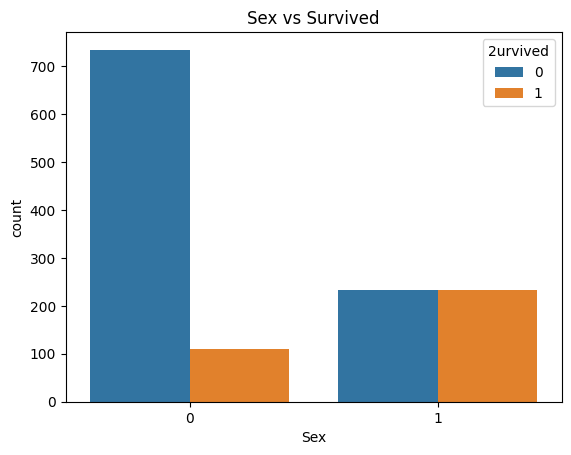

In [27]:
# Visualize the relationship between 'Sex' and '2urvived'
sns.countplot(x='Sex', hue='2urvived', data=data)
plt.title('Sex vs Survived')
plt.show()

Feature Engineering

3.1 Create new features if necessary

In [29]:
# Create a new feature 'FamilySize' as the sum of 'sibsp' and 'Parch' + 1
data['FamilySize'] = data['sibsp'] + data['Parch'] + 1

# Create a new feature 'IsAlone' (1 if FamilySize == 1, else 0)
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1


Model Training

4.1 Split the data into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split

#features and target variables
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = data[features]
y = data['2urvived']

#let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.2 Train various classification models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression - Accuracy:', accuracy_score(y_test, y_pred_logreg))

#train decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print('Decision Tree - Accuracy:', accuracy_score(y_test, y_pred_tree))

#train random forest
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)
print('Random forest - Accuracy:', accuracy_score(y_test, y_pred_forest))

#train support vactor machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print('Support Vector Machine - Accuracy:', accuracy_score(y_test, y_pred_svc))


Logistic Regression - Accuracy: 0.7709923664122137
Decision Tree - Accuracy: 0.7061068702290076
Random forest - Accuracy: 0.6984732824427481
Support Vector Machine - Accuracy: 0.7633587786259542


Model Evaluation and Selection

5.1 Compare the performance of different models

In [40]:
models = {
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'Random Forest': forest,
    'Support Vector Machine': svc
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred):.4f}, Recall: {recall_score(y_test, y_pred):.4f}, F1 Score: {f1_score(y_test, y_pred):.4f}')


Logistic Regression - Accuracy: 0.7710, Precision: 0.6667, Recall: 0.3562, F1 Score: 0.4643
Decision Tree - Accuracy: 0.7061, Precision: 0.4750, Recall: 0.5205, F1 Score: 0.4967
Random Forest - Accuracy: 0.6985, Precision: 0.4559, Recall: 0.4247, F1 Score: 0.4397
Support Vector Machine - Accuracy: 0.7634, Precision: 0.6486, Recall: 0.3288, F1 Score: 0.4364


Conclusion and Insights

6.1 Analyze the importance of different features

      Feature  Importance
2         Age    0.347076
3        Fare    0.337321
1         Sex    0.151692
0      Pclass    0.059109
5  FamilySize    0.058864
4    Embarked    0.032807
6     IsAlone    0.013132


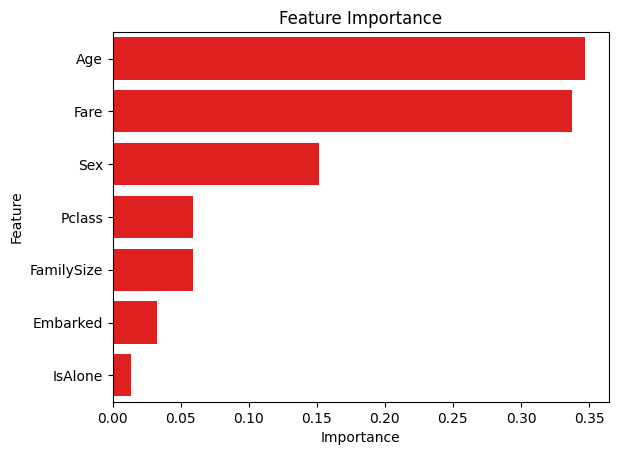

In [43]:
importances = forest.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance)


sns.barplot(x='Importance', y='Feature', data=feature_importance, color='red')
plt.title('Feature Importance')
plt.show()
